# MNIST - Categorical Classification
> # L2 Regularization


In [1]:
import warnings
warnings.filterwarnings('ignore')

# I. MNIST Data_Set Load

In [2]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


# II. Data Preprocessing

> ## 1) Reshape and Normalization

* reshape

In [3]:
X_train = X_train.reshape((60000, 28 * 28))
X_test = X_test.reshape((10000, 28 * 28))

* Normalization

In [4]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

> ## 2) One Hot Encoding

In [5]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# III. MNIST Keras Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의
 - 2개의 Hidden Layers & 768개의 Nodes
 - Model Capacity는 기존과 동일
 - L2 Regularization 적용

In [6]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation = 'relu',
                       kernel_regularizer = regularizers.l2(0.00001),
                       input_shape=(28 * 28,)))
mnist.add(layers.Dense(256, activation = 'relu',
                       kernel_regularizer = regularizers.l2(0.00001)))
mnist.add(layers.Dense(10, activation = 'softmax'))

* 모델 구조 확인

In [7]:
mnist.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

* 모델 학습방법 설정

In [8]:
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 약 4분

In [9]:
%%time

Hist_mnist = mnist.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 7s 7ms/step - loss: 0.2651 - accuracy: 0.9220 - val_loss: 0.1266 - val_accuracy: 0.9651
Epoch 2/100
375/375 [==============================] - 2s 6ms/step - loss: 0.1050 - accuracy: 0.9712 - val_loss: 0.1035 - val_accuracy: 0.9724
Epoch 3/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0711 - accuracy: 0.9809 - val_loss: 0.1020 - val_accuracy: 0.9737
Epoch 4/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0549 - accuracy: 0.9855 - val_loss: 0.1012 - val_accuracy: 0.9754
Epoch 5/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0445 - accuracy: 0.9890 - val_loss: 0.1003 - val_accuracy: 0.9769
Epoch 6/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0370 - accuracy: 0.9919 - val_loss: 0.1046 - val_accuracy: 0.9776
Epoch 7/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0345 - accuracy: 0.9926 - val_loss: 0.1045 - val_accuracy: 0.9796

> ## 4) 학습 결과 시각화

* Loss Visualization

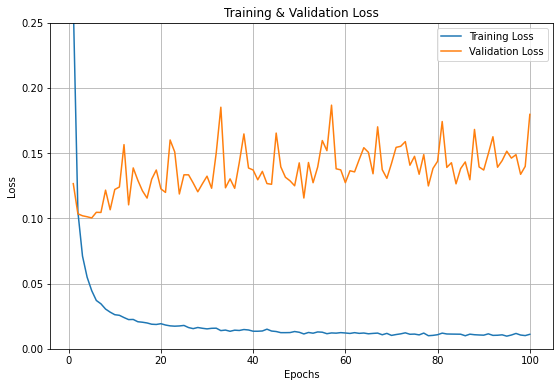

In [10]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [11]:
loss, accuracy = mnist.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.1891 - accuracy: 0.9734
Loss = 0.18912
Accuracy = 0.97340


# 
# 
# 
# The End
# 
# 
# 